Finding all categories of Diseases


In [ ]:
import pandas as pd

# Load CSV
df = pd.read_csv("Dataset/Data_Entry_2017.csv")

# Display unique disease labels
unique_labels = set()
for labels in df["Finding Labels"]:
    for label in labels.split("|"):  
        unique_labels.add(label)

print("Unique Disease Categories:", unique_labels)

Unique Disease Categories: {'Edema', 'Consolidation', 'Fibrosis', 'Emphysema', 'Hernia', 'No Finding', 'Mass', 'Atelectasis', 'Infiltration', 'Cardiomegaly', 'Nodule', 'Pneumonia', 'Effusion', 'Pleural_Thickening', 'Pneumothorax'}


In [2]:
import os
import shutil

# Define paths
source_dir = "Dataset/images" 
output_dir = "Processed_Images"

# Create directories for each disease
for label in unique_labels:
    label_dir = os.path.join(output_dir, label)
    os.makedirs(label_dir, exist_ok=True)

# Move images to respective folders
for _, row in df.iterrows():
    img_name = row["Image Index"]
    labels = row["Finding Labels"].split("|")  # Some images have multiple labels

    for label in labels:
        src_path = os.path.join(source_dir, img_name)
        dst_path = os.path.join(output_dir, label, img_name)
        
        if os.path.exists(src_path):  
            shutil.copy(src_path, dst_path)  # Copy instead of move to allow multi-label images

print("✅ Images Organized by Disease!")


✅ Images Organized by Disease!


In [7]:
import os
import cv2
import numpy as np
from tqdm import tqdm

# Define paths
input_dir = "Processed_Images"
output_dir = "Preprocessed_Images"
os.makedirs(output_dir, exist_ok=True)

# Target image size
IMG_SIZE = 224

# Loop through all disease categories
for disease in os.listdir(input_dir):
    disease_path = os.path.join(input_dir, disease)
    output_disease_path = os.path.join(output_dir, disease)
    os.makedirs(output_disease_path, exist_ok=True)

    for img_name in tqdm(os.listdir(disease_path), desc=f"Processing {disease}"):
        img_path = os.path.join(disease_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize
        img = img / 255.0  # Normalize to [0,1]

        # Save preprocessed image
        np.save(os.path.join(output_disease_path, img_name.replace('.png', '.npy')), img)

print("✅ Image Preprocessing Complete!")


Processing Pneumothorax: 100%|██████████| 199/199 [00:07<00:00, 25.97it/s]

✅ Image Preprocessing Complete!


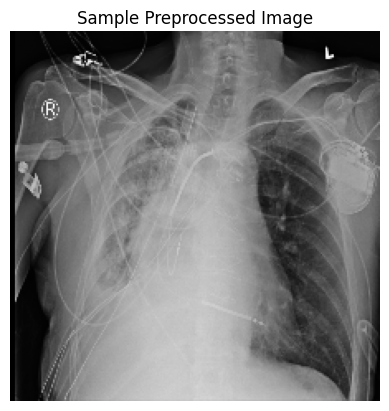

In [9]:
import matplotlib.pyplot as plt

# Load and display a sample image
sample_image = np.load(os.path.join(output_dir, "Pneumonia", "00000013_010.npy"))

plt.imshow(sample_image, cmap="gray")
plt.title("Sample Preprocessed Image")
plt.axis("off")
plt.show()